In [ ]:
!pip install networkx

/home/vincent/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


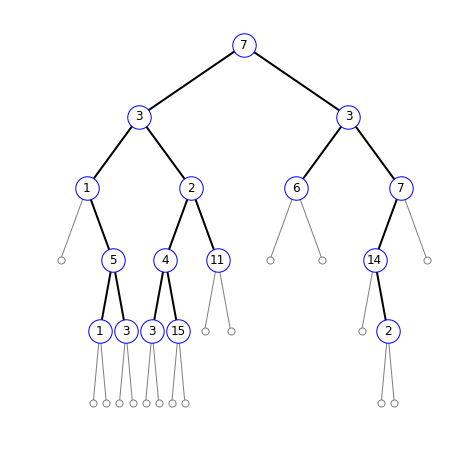

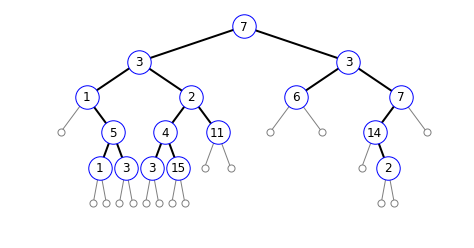

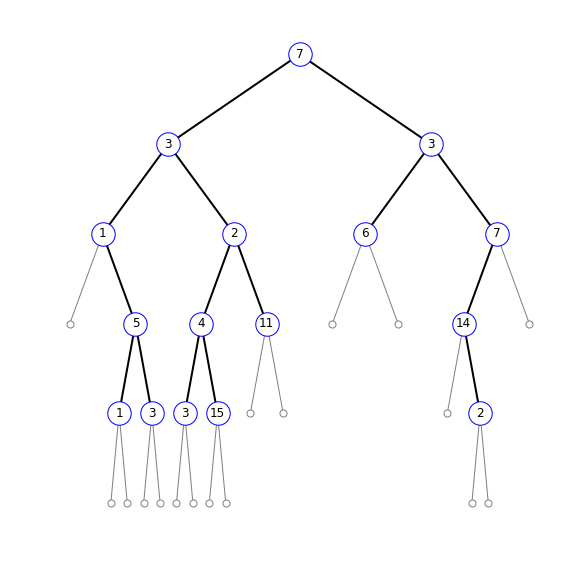

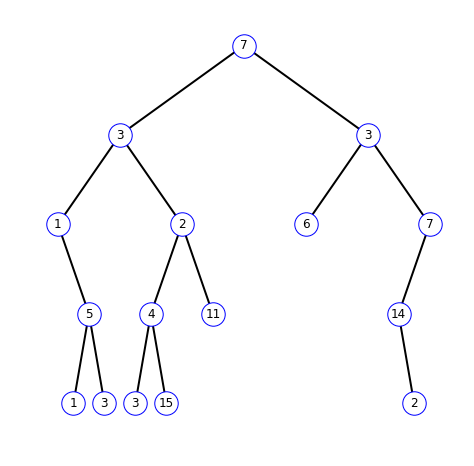

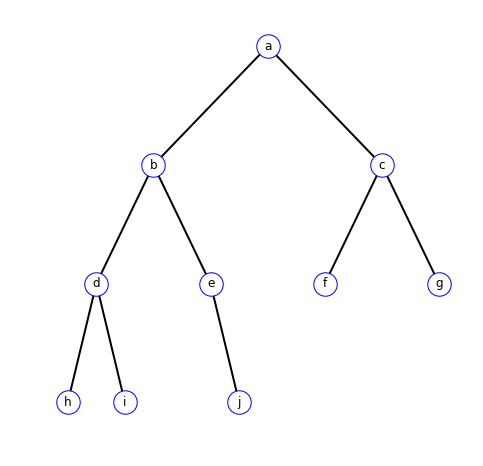

In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

class Noeud:
    def __init__(self, valeur, gauche = None, droit = None):
        self.valeur = valeur
        self.gauche = gauche
        self.droit = droit

def hauteur(arbre):
    if arbre is None:
        return 0
    else:
        return 1 + max(hauteur(arbre.gauche), hauteur(arbre.droit))

def repr_graph(arbre, size=(8,8), null_node=False):
    """
    size : tuple de 2 entiers. Si size est int -> (size, size)
    null_node : si True, trace les liaisons vers les sous-arbres vides
    """
    def parkour(arbre, noeuds, branches, labels, positions, profondeur, pos_courante, pos_parent, null_node):
        if arbre is not None:
            noeuds[0].append(pos_courante)
            positions[pos_courante] = (pos_courante, profondeur)
            profondeur -= 1
            labels[pos_courante] = str(arbre.valeur)
            branches[0].append((pos_courante, pos_parent))
            pos_gauche = pos_courante - 2**profondeur
            parkour(arbre.gauche, noeuds, branches, labels, positions, profondeur, pos_gauche, pos_courante, null_node)
            pos_droit = pos_courante + 2**profondeur
            parkour(arbre.droit, noeuds, branches, labels, positions, profondeur, pos_droit, pos_courante, null_node)
        elif null_node:
            noeuds[1].append(pos_courante)
            positions[pos_courante] = (pos_courante, profondeur)
            branches[1].append((pos_courante, pos_parent))
    
    
    if arbre is None:
        return
    
    branches = [[]]
    profondeur = hauteur(arbre)
    pos_courante = 2**profondeur
    noeuds = [[pos_courante]]
    positions = {pos_courante: (pos_courante, profondeur)} 
    labels = {pos_courante: str(arbre.valeur)}
    
    if null_node:
        branches.append([])
        noeuds.append([])
        
    profondeur -= 1
    parkour(arbre.gauche, noeuds, branches, labels, positions, profondeur, pos_courante - 2**profondeur, pos_courante, null_node)
    parkour(arbre.droit, noeuds, branches, labels, positions, profondeur, pos_courante + 2**profondeur, pos_courante, null_node) 

    mon_arbre = nx.Graph()
    
    if type(size) == int:
        size = (size, size)    
    plt.figure(figsize=size)
    
    nx.draw_networkx_nodes(mon_arbre, positions, nodelist=noeuds[0], node_color="white", node_size=550, edgecolors="blue")
    nx.draw_networkx_edges(mon_arbre, positions, edgelist=branches[0], edge_color="black", width=2)
    nx.draw_networkx_labels(mon_arbre, positions, labels)

    if null_node:
        nx.draw_networkx_nodes(mon_arbre, positions, nodelist=noeuds[1], node_color="white", node_size=50, edgecolors="grey")
        nx.draw_networkx_edges(mon_arbre, positions, edgelist=branches[1], edge_color="grey", width=1)

    ax = plt.gca()
    ax.margins(0.1)
    plt.axis("off")
    plt.show()


a2 = Noeud(7, 
           (Noeud(3, 
                  Noeud(1, 
                        None, Noeud(5, Noeud(1), Noeud(3))),
                  Noeud(2, 
                        Noeud(4, Noeud(3), Noeud(15)), Noeud(11)))), 
           Noeud(3, Noeud(6), Noeud(7, Noeud(14, None, Noeud(2)))))

#a2 = Noeud(1, (Noeud(2, None, Noeud(4, Noeud(7, Noeud(10), Noeud(11)), Noeud(8)))), Noeud(3, Noeud(5), Noeud(6, Noeud(9))))
#a2 = Noeud(1, Noeud(2))
repr_graph(a2, (8,8), True)
repr_graph(a2, (8,4), True)
repr_graph(a2, 10, True)
repr_graph(a2)


arbre_f = Noeud('f')
arbre_g = Noeud('g')
arbre_c = Noeud('c',arbre_f,arbre_g)
arbre_h = Noeud('h')
arbre_i = Noeud('i')
arbre_j = Noeud('j')
arbre_d = Noeud('d',arbre_h,arbre_i)
arbre_e = Noeud('e',None, arbre_j)
arbre_b = Noeud('b',arbre_d,arbre_e)
arbre_a = Noeud('a',arbre_b,arbre_c)
repr_graph(arbre_a)


In [ ]:
def parfait(n, p=None):
    if p is None:
        p = 1
    if n == 0:
        return None
    return Noeud(p, parfait(n-1,2*p), parfait(n-1,2*p+1))

pe = parfait(6)
repr_graph(pe, (16,6))

In [ ]:
a = Noeud(7, Noeud(5, Noeud(4, Noeud(2, Noeud(1), Noeud(3))), Noeud(6)),
          Noeud(10, Noeud(8, None, Noeud(9))))
repr_graph(a, (8,4), True)

In [ ]:
a = Noeud(6, Noeud(1, None, Noeud(2, None, Noeud(4, Noeud(3), Noeud(5)))),
          Noeud(7, None, Noeud(8)))
repr_graph(a, (8,4), True)


In [ ]:
a = Noeud(6, Noeud(3, Noeud(1,None, Noeud(2, None, None)), 
                   Noeud(4,None, Noeud(5,None, None))),Noeud(8,Noeud(7), Noeud(9)))
repr_graph(a, (8,4), True)


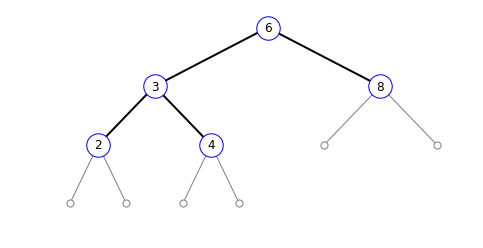

In [2]:
a =Noeud(6, Noeud(3, Noeud(2, None, None), Noeud(4, None, None)), Noeud(8, None, None))
repr_graph(a, (8,4), True)


In [ ]:
a =Noeud(4,Noeud(3,Noeud(1,Noeud(0),Noeud(2)),None),Noeud(8,Noeud(7),Noeud(9)))
repr_graph(a, (8,4), True)